# Multilayer Perceptron

After the first notebook, we now have an impression on what neural networks and deep learning are capable of. But one question remained open:
<center>__What is a neural network?__</center>

We start with the most basic form of a neural network, the **multi-layer perceptron (MLP)**, which goes back to Frank Rosenblatt in 1957.

<img src="images/rosenblatt.jpeg"  style="width: 600px;"/>
http://videolectures.net/site/normal_dl/tag=983658/deeplearning2015_bottou_neural_networks_01.pdf.

## Definition of MLP

Mathematically speaking, an MLP is a function $f: \mathbb{R}^m \to \mathbb{R}^n$ that is written in the form 
$$f(x) = a_L(W_L \cdot a_{L-1}(W_{L-1}\cdots a_2(W_2 \cdot a_1(W_1 \cdot x + b_1) + b_2)\cdots) + b_{L}),$$
where the $W_i \in \mathbb{R}^{\ell_i \times \ell_{i-1}}$, $b_i \in \mathbb{R}^{\ell_i}$ and $a_i:\mathbb{R}^{\ell_i} \to \mathbb{R}^{\ell_i}$ are **weight matrices**, **biases** and **activation functions**, respectively.

<img src="images/iris.jpg"  style="width: 900px;"/>

<img src="images/mlp.png"  style="width: 900px;"/>
https://www.tensorflow.org/get_started/premade_estimators

### Example: Linear Regression

Choosing $L=1$ and $a(x) = x$ as the identity, gives $f(x) = W x + b$. In particular, linear regression is a special case of neural networks.

To work with neural networks, Google's [tensorflow](https://www.tensorflow.org/) is a rich and well-documented library. Its core is built around computational graphs. For exploration, it is more convenient to use the lighter *eager execution environment*.

In [6]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

The linear model can be realized conveniently in tensorflow.

In [2]:
input_dim = 13

class LM(tfe.Network):  
    def __init__(self):    
        super(LM, self).__init__()  
        self.b = tfe.Variable(tf.zeros((1,)))
        self.W = tfe.Variable(tf.random_uniform((1,input_dim), -1, 1))
    
    def call(self, input):   
            result = tf.matmul(self.W, input) + self.b  
            return result

Given the initial weights, we can evaluate the model on input data.

In [3]:
tf.set_random_seed(42)

model = LM()
x = tf.random_uniform((input_dim,1), -1, 1)
model(x)

<tf.Tensor: id=33, shape=(1, 1), dtype=float32, numpy=array([[1.5954614]], dtype=float32)>

### Example: Logistic Regression

Next, we choose $L=1$ and $a(x) = \tfrac{1}{1+e^{-x}}$ to recover the case of logistic regression. That is,  
$$f(x) = \frac{1}{1 + e^{-W x - b}}$$

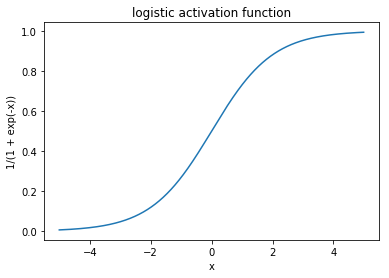

In [3]:
import matplotlib.pyplot as plt  
import numpy as np  
%matplotlib inline

t = np.arange(-5, 5, 0.01)  
s = 1/(1 + np.exp(-t))
plt.plot(t, s)  

plt.xlabel('x')  
plt.ylabel('1/(1 + exp(-x))')  
plt.title('logistic activation function')   
plt.show()  

### Example: Softmax

The example of logistic regression described above is only suitable for distinguishing two classes. When we want to distinguish $n \ge 3$ classes, we can use an extension known as **soft-max**.

Suppose $x \in \mathbb R^m$ is an $m$-dimensional feature-vector. Then, for a weight-matrix $W \in \mathbb R^{n \times m}$ and a bias-vector $b \in \mathbb R^n$, we set $z = Wx + b$. The *soft-max* of $z$ is defined as the vector whose $k$th component equals
$$\frac{e^{z_k}}{\sum_{i \le n} e^{z_i}}$$

For $n=2$ we recover logistic regression.

### Homework: Multiple Layers

* Implement a perceptron with multiple layers.
* Add logistic regression and softmax as non-linearities